# **Machine Learning approach to predict real or fake tweets about disaster**
---

# Project Description

[Twitter](https://twitter.com/?lang=en) has become an important communication channel in times of emergency.   
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time.    
Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

# Objective     

[Sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) is a common use case of [NLP](https://machinelearningmastery.com/natural-language-processing/) where the idea is to classify the tweet as positive, negative or neutral depending upon the text in the tweet.     
This problem goes a way ahead and expects us to also determine the words in the tweet which decide the polarity of the tweet.

In this project [Machine Learning](https://www.geeksforgeeks.org/machine-learning/) models are implemented for predicting that a tweet regarding a disaster is real or fake    
Whole code below is in [Python](https://www.python.org/) using various libraries. Open source library [Scikit-Learn](https://scikit-learn.org/) is used for creating the models.

<p align="center">
    <br clear="right"/>
    <img src="https://geeklevel1000.com/wp-content/uploads/2019/01/Machine-learning-768x512.jpg" alt="Tweets" width="800" height="1000" />
</p>

#  Table of Contents


 1. Dependancies and Dataset

 2. Data Exploration
 
 3. Data Cleaning

 4. Extra Data Exploration and Analysis on Cleaned Text

 5. Spliting data

 6. Machine Learning Models

 7. Comparing accuracies of all models
 
 8. Conclusion


# 1. Dependancies and Dataset

## 1.1 Importing dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

#libraries for NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import HTML
!pip install chart_studio
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from collections import defaultdict
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 64 kB 274 kB/s 


## 1.2 Reading and preparation of data

Reading [data](https://www.kaggle.com/c/nlp-getting-started/data) and choosing important columns using [pandas](https://pandas.pydata.org/)

In [2]:
data = pd.read_csv('../input/nlp-getting-started/train.csv')

Displaying first 10 rows of our data using [DataFrame.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

In [3]:
data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


Concise summarization of total information provided by the data using [DataFrame.info()](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.info.html)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


We only use text and target column of dataset for rest of our work as there lot's of null values inside other columns

In [5]:
data = data[['text','target']]
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## 2. Data Exploration

## 2.1 Visualising counts of real and fake tweets

Let's plot the counts of values under the target column

In [6]:
fig = px.bar(x=["0","1"], y=data["target"].value_counts(),color=["red", "goldenrod"])

#Change this value for bar widths
for dt in fig.data:
    dt["width"] = 0.4 

fig.update_layout(
    title_text = "Counts for Disaster and Non-Disaster Tweets",
    title_x=0.5,
    width=800,
    height=550,
    xaxis_title="Targets",
    yaxis_title="Count",
    showlegend=False
).show()

# py.plot(fig,filename='Counts for Disaster and Non-Disaster Tweets',auto_open=False,show_link=False)

The plot shows that our data is quite balanced, you can also click on the plot to explore more about [interactive plots](https://plotly.com/) 


<div>
    <a href="https://plotly.com/~raklugrin01/1/?share_key=hgjA8Zkl35RjZtywNHe0jm" target="_blank" title="Counts for Disaster and Non-Disaster Tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/1.png?share_key=hgjA8Zkl35RjZtywNHe0jm" alt="Counts for Disaster and Non-Disaster Tweets" style="max-width: 100%;width: 1000px;"  width="1000" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:1" sharekey-plotly="hgjA8Zkl35RjZtywNHe0jm" src="https://plotly.com/embed.js" async></script>
</div>

## 2.2 Visualising lengths of tweets

Analyzing lengths of words in a tweets according to it being real or fake target value by ploting [histograms](https://plotly.com/python/histograms/)

In [7]:
from plotly.subplots import make_subplots

word_len_dis = data[data['target']==1]['text'].str.split().map(lambda x : len(x))

word_len_non_dis = data[data['target']==0]['text'].str.split().map(lambda x : len(x))

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
            go.Histogram(x=word_len_dis,marker_line=dict(color='black'),marker_line_width=1.2),
            row=1, col=1
).add_trace(
            go.Histogram(x=word_len_non_dis,marker_line=dict(color='black'),marker_line_width=1.2),
            row=1, col=2
).update_layout(title_text="Length of words in Tweets",title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Length of words in Tweets',auto_open=False,show_link=False)

From the plot we can say that the number of words in the tweets ranges from 2 to 30 in both cases

<div>
    <a href="https://plotly.com/~raklugrin01/3/?share_key=c65IIAyuBQBfgU1Rfovdfb" target="_blank" title="Length of words in Tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/3.png?share_key=c65IIAyuBQBfgU1Rfovdfb" alt="Length of words in Tweets" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:3" sharekey-plotly="c65IIAyuBQBfgU1Rfovdfb" src="https://plotly.com/embed.js" async></script>
</div>


## 2.3 Visualising average word lengths of tweets

Checking average word length for both type of tweets

In [8]:
def avgwordlen(strlist):
    sum=[]
    for i in strlist:
        sum.append(len(i))
    return sum

avgword_len_dis = data[data['target']==1]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

avgword_len_non_dis = data[data['target']==0]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

group_labels = ['Disaster', 'Non-Disaster']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = ff.create_distplot([avgword_len_dis, avgword_len_non_dis], group_labels, bin_size=.2, colors=colors,)

fig.update_layout(title_text="Average word length in tweets",title_x=0.5,xaxis_title="Text",yaxis_title="Density").show()

# py.plot(fig,filename='Average word length in tweets',auto_open=False,show_link=False)

From the [distplot](https://plotly.com/python/distplot/), average word countss for real disaster tweets are found to be in the range(5-7.5)                 
while for fake disaster tweets are in the range of (4-6).

<div>
    <a href="https://plotly.com/~raklugrin01/5/?share_key=tfNQPMyUblqOh7JL1sEiqW" target="_blank" title="Average word length in tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/5.png?share_key=tfNQPMyUblqOh7JL1sEiqW" alt="Average word length in tweets" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:5" sharekey-plotly="tfNQPMyUblqOh7JL1sEiqW" src="https://plotly.com/embed.js" async></script>
</div>


## 2.4 Visualising most common stop words in the text data


### What is a corpus?

In linguistics and NLP, corpus (literally Latin for body) refers to a collection of texts.   
Such collections may be formed of a single language of texts, or can span multiple languages
   
Function for creating sample [corpus](https://21centurytext.wordpress.com/home-2/special-section-window-to-corpus/what-is-corpus/) for further analysis.    

In [9]:
def create_corpus(target):
    corpus = []
    for i in data[data['target']==target]['text'].str.split():
        for x in i:
            corpus.append(x)
    return corpus

### What are stopwords?

In computing, stop words are words that are filtered out before or after the natural language data (text) are processed.       
While “stop words” typically refers to the most common words in a language, all-natural language processing tools don't use a single universal list of stop words.  

Analysing most occuring [stop words](https://en.wikipedia.org/wiki/Stop_word) in the text using corpus creating function(create_corpus)

In [10]:
values_list = []

def analyze_stopwords(data,func,targetlist):
  
  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)
    
    for word in corpus:
        dic[word] += 1
    
    top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
    x_items,y_values = zip(*top)
    values_list.append(x_items)
    values_list.append(y_values)

#analyzing stopwords for 0 and 1 target labels
analyze_stopwords(data,create_corpus,[0,1])

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
      go.Bar(x=values_list[1],y=values_list[0],orientation='h',marker=dict(color= 'rgba(152, 255, 74,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=values_list[3],y=values_list[2],orientation='h',marker=dict(color= 'rgba(255, 143, 92,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=2
).update_layout(title_text="Top stop words in the text",title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Top stop words in the text',auto_open=False,show_link=False)

The [Bar Charts](https://plotly.com/python/bar-charts/) displays the top 10 stop words in tweets where **'the'** is most frequent in both groups

<div>
    <a href="https://plotly.com/~raklugrin01/13/?share_key=icoxxtajqMGbKIizrTLUX0" target="_blank" title="Top stop words in the text" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/13.png?share_key=icoxxtajqMGbKIizrTLUX0" alt="Top stop words in the text" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:13" sharekey-plotly="icoxxtajqMGbKIizrTLUX0" src="https://plotly.com/embed.js" async></script>
</div>

## 2.5 Visualising most common punctuations in the text data

Now let's have a look at the punctuations inside our data

In [11]:
#The above Bar Charts displays the top 10 stop words in tweets where the occurs the most in both groups
# Anaysing Punctuations
from string import punctuation
values_list = []
def analyze_punctuations(data,func,targetlist):
  
  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)
    
    for word in corpus:
        if word in punctuation:
            dic[word] += 1 
    x_items, y_values = zip(*dic.items())
    values_list.append(x_items)
    values_list.append(y_values)

#analyzing punctuations for 0 and 1 target labels
analyze_punctuations(data,create_corpus,[0,1])

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))
  
fig.add_trace(
      go.Bar(x=values_list[0],y=values_list[1],
             marker=dict(color= 'rgba(196, 94, 255,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=values_list[2],y=values_list[3],
             marker=dict(color= 'rgba(255, 163, 102,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=2
).update_layout(title_text="Top Punctuations in the text",title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Top Punctuations in the text',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/15/?share_key=9JgPThmm677jJmNjJTc0BZ" target="_blank" title="Top Punctuations in the text" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/15.png?share_key=9JgPThmm677jJmNjJTc0BZ" alt="Top Punctuations in the text" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:15" sharekey-plotly="9JgPThmm677jJmNjJTc0BZ" src="https://plotly.com/embed.js" async></script>
</div>


# 3. Data Cleaning

## 3.1 Removing unwanted text using regular expressions

### What is Stemming?  
Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.   
Stemming is important in natural language understanding (NLU) and natural language processing (NLP). Here we use SnowballStemmer.

Function for cleaning the data, we use [RegEx](https://docs.python.org/3/library/re.html) i.e. re python library and [SnowballStemmer()](https://www.nltk.org/_modules/nltk/stem/snowball.html) to stem the words.

In [12]:
stemmer = SnowballStemmer("english")

def preprocess_data(data):
    
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) 
    
    #decontraction
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    # Match all digits in the string and replace them by empty string
    text = re.sub(r'[0-9]', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    # filtering out miscellaneous text.
    text = re.sub('[^a-zA-Z]',' ',text) 
    text = re.sub(r"\([^()]*\)", "", text)
    
    # remove mentions
    text = re.sub('@\S+', '', text)  
    
    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  
    

    # Lowering all the words in text
    text = text.lower()
    text = text.split()
    
    text = [stemmer.stem(words) for words in text if words not in stopwords.words('english')]
    
    # Removal of words with length<2
    text = [i for i in text if len(i)>2] 
    text = ' '.join(text)
    return text

data["Cleaned_text"] = data["text"].apply(preprocess_data)

Displaying Cleaned Data 

In [13]:
data.head()

,text,target,Cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv
1,Forest fire near La Ronge Sask. Canada,1,forest fire near rong sask canada
2,All residents asked to 'shelter in place' are ...,1,resid ask ishelt place notifi offic evacu shel...
3,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


# 4. Extra Data Exploration and Analysis on Cleaned Text

## 4.1  Creating function and data for visualising words

Using the popular [WordCloud](https://www.python-graph-gallery.com/wordcloud/) python library for visulaising the cleaned data

In [14]:
def wordcloud(data,title):
    words = ' '.join(data['Cleaned_text'].astype('str').tolist())
    stopwords = set(STOPWORDS)
    wc = WordCloud(stopwords = stopwords,width= 512, height = 512).generate(words)
    plt.figure(figsize=(10,8),frameon=True)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title,fontsize=20)
    plt.show()
    
data_disaster = data[data['target'] == 1]
data_non_disaster = data[data['target'] == 0]

## 4.2 Visualising words inside Real Disaster Tweets

we can see that most common words in disaster tweets are fire,storm,flood , police etc. 

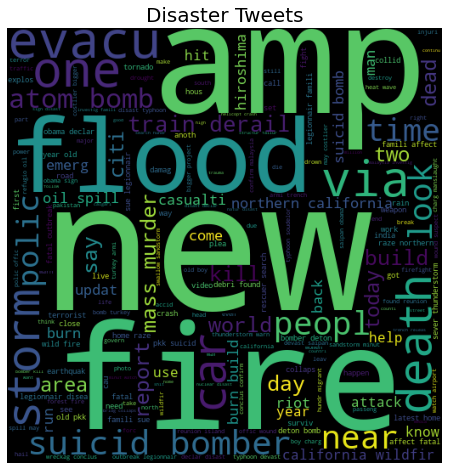

In [15]:
wordcloud(data_disaster,"Disaster Tweets")

## 4.3 Visualising words inside Fake Disaster Tweets

love,new,time etc are the most common words as we can see in wordcloud of Non-disaster tweets

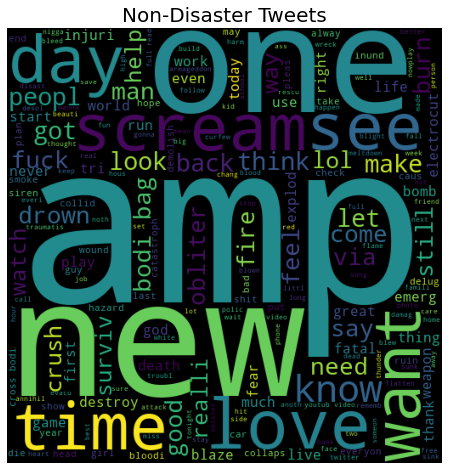

In [16]:
wordcloud(data_non_disaster,"Non-Disaster Tweets")

## 4.4 Removing unwanted words with high frequency

Our cleaned text still contains some unnecessary words (such as: like, amp, get, would etc.) that aren't relevant and can confuse our model,    
resulting in false prediction. Now, we will further remove some words with high frequency from text based on above charts.

In [17]:
common_words = ['via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

data["Cleaned_text"] = data["Cleaned_text"].apply(text_cleaning)

## 4.5 Analysing top 10 N-grams where N is 1,2,3

### What do you mean by N-grams?  
N-grams of texts are extensively used in text mining and natural language processing tasks.     They are basically a set of co-occurring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios).  

For example, for the sentence “The cow jumps over the moon”. If N=2 (known as bigrams), then the ngrams would be:  
* the cow 
* cow jumps 
* jumps over 
* over the 
* the moon

Below we perform [N-grams](https://en.wikipedia.org/wiki/N-gram#:~:text=In%20the%20fields%20of%20computational,a%20text%20or%20speech%20corpus.) analysis on cleaned data

In [18]:
def top_ngrams(data,n,grams):
    count_vec = CountVectorizer(ngram_range=(grams,grams)).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True) 
    return word_freq[:n]

Creating data of top 10 n-grams for n = 1, 2, 3

In [19]:
common_uni = top_ngrams(data["Cleaned_text"],10,1)
common_bi = top_ngrams(data["Cleaned_text"],10,2)
common_tri = top_ngrams(data["Cleaned_text"],10,3)
common_uni_df = pd.DataFrame(common_uni,columns=['word','freq'])
common_bi_df = pd.DataFrame(common_bi,columns=['word','freq'])
common_tri_df = pd.DataFrame(common_tri,columns=['word','freq'])

## 4.6 Visualising top 10 N-grams for N = 1, 2, 3

In [20]:
fig = make_subplots(rows=3, cols=1,subplot_titles=("Top 20 Unigrams in Text", "Top 20 Bigrams in Text","Top 20 Trigrams in Text"))
  
fig.add_trace(
      go.Bar(x=common_uni_df["word"],y=common_uni_df["freq"],
             marker=dict(color= 'rgba(255, 170, 59,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=common_bi_df["word"],y=common_bi_df["freq"],
             marker=dict(color= 'rgba(89, 255, 147,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=2, col=1
).add_trace(
      go.Bar(x=common_tri_df["word"],y=common_tri_df["freq"],
             marker=dict(color= 'rgba(89, 153, 255,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=3, col=1
).update_layout(title_text="Visualization of Top 20 Unigrams, Bigrams and Trigrams",
                title_x=0.5,showlegend=False,width=800,height=1600,).update_xaxes(tickangle=-90).show()

# py.plot(fig,filename='Visualization of Top 20 Unigrams, Bigrams and Trigrams',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/17/?share_key=rHBUmASeWITErHR7rEdZqJ" target="_blank" title="Visualization of Top 20 Unigrams, Bigrams and Trigrams" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/17.png?share_key=rHBUmASeWITErHR7rEdZqJ" alt="Visualization of Top 20 Unigrams, Bigrams and Trigrams" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:17" sharekey-plotly="rHBUmASeWITErHR7rEdZqJ" src="https://plotly.com/embed.js" async></script>
</div>


# 5. Data Preprocessing 

## 5.1 Spliting original data after cleaning 

In [21]:
X_inp_clean = data['Cleaned_text']
X_inp_original = data['text']
y_inp = data['target']

Using [scikit-learn's train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data into training and validation dataset

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_inp_clean, y_inp, test_size=0.2, random_state=42, stratify=y_inp)
y_train = np.array(y_train)
y_valid = np.array(y_valid)

checking size of data after train test split

In [23]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6090,), (1523,), (6090,), (1523,))

## 5.2 Creating function to encode data using BoW or TF-IDF

### What is BoW?   
BoW stands for "*bag of words*" which is a representation of text that describes the occurrence of words within a document.   
We just keep track of word counts and disregard the grammatical details and the word order.   
It is called a “bag” of words because any information about the order or structure of words in the document is discarded. 
The model is only concerned with whether known words occur in the document, not where in the document.
    
    
### What is TF-IDF?
TF-IDF which means Term Frequency and Inverse Document Frequency, is a scoring measure widely used in information retrieval (IR) or summarization.     
TF-IDF is intended to reflect how relevant a term is in a given document. It is a technique in Natural Language Processing for converting words in Vectors and with some semantic information and it gives weighted to uncommon words , used in various NLP applications.    

For [BoW](https://www.mygreatlearning.com/blog/bag-of-words/) approach we use scikit-learn's [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and for [TF-IDF](https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76) we use [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [24]:
def encoding(train_data,valid_data,bow=False,n=1,tf_idf=False):
    if bow==True:
        cv = CountVectorizer(ngram_range=(n,n))
        cv_df_train = cv.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(cv_df_train,columns=cv.get_feature_names())
        cv_df_valid = cv.transform(valid_data).toarray()
        valid_df = pd.DataFrame(cv_df_valid,columns=cv.get_feature_names())
        
    elif tf_idf==True:
        
        tfidf = TfidfVectorizer(ngram_range=(n, n), use_idf=1,smooth_idf=1,sublinear_tf=1)    
        tf_df_train = tfidf.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(tf_df_train,columns=tfidf.get_feature_names())
        tf_df_valid = tfidf.transform(valid_data).toarray()
        valid_df = pd.DataFrame(tf_df_valid,columns=tfidf.get_feature_names())
        
    return train_df,valid_df 

## 5.3 Encoding training and validation data

We encode our data in all possible combinations provided by our function

In [25]:
X_train_bow1 , X_valid_bow1 = encoding(X_train,X_valid,bow=True) 
X_train_bow2 , X_valid_bow2 = encoding(X_train,X_valid,bow=True,n=2) 
X_train_bow3 , X_valid_bow3 = encoding(X_train,X_valid,bow=True,n=3) 
X_train_tfidf1 , X_valid_tfidf1 = encoding(X_train,X_valid,tf_idf=True) 
X_train_tfidf2 , X_valid_tfidf2 = encoding(X_train,X_valid,tf_idf=True,n=2) 
X_train_tfidf3 , X_valid_tfidf3 = encoding(X_train,X_valid,tf_idf=True,n=3)

# 6. Training and tuning Machine Learining Models

### What is a classification report?
A Classification report is used to measure the quality of predictions from a classification algorithm.   
The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. 
### What is a confusion matrix?
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.  

#### In a confusion matrix there are 4 basic terminologies :
* **true positives (TP)** : We predicted yes (they are real tweets), and they are actually real.
* **true negatives (TN)** : We predicted no, and they are fake.
* **false positives (FP)**: We predicted yes, but they are't actually real. (Also known as a "Type I error.")
* **false negatives (FN)**: We predicted no, but they are real. (Also known as a "Type II error.")

Now let's create functions to display model's [classification report](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn) and [confusion matrix](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

In [26]:
def c_report(y_true,y_pred):
    print("Classifictaion Report")
    print(classification_report(y_true, y_pred))
    acc_scr = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_scr))
    return acc_scr

def plot_cm(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

## 6.1 Logistic Regression

### About Logistic Regression   

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Now let's create a [Logistic Regression](https://medium.com/analytics-vidhya/applying-text-classification-using-logistic-regression-a-comparison-between-bow-and-tf-idf-1f1ed1b83640) model and train it.

In [27]:
model_bow1_logreg = LogisticRegression()
model_bow1_logreg.fit(X_train_bow1,y_train)
pred_bow1_logreg = model_bow1_logreg.predict(X_valid_bow1)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       869
           1       0.82      0.73      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.81      1523

Accuracy : 0.8161523309258043


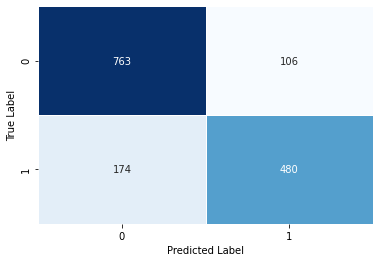

In [28]:
acc_bow1_logreg = c_report(y_valid,pred_bow1_logreg)
plot_cm(y_valid,pred_bow1_logreg)

Now training another Logistic Regression model with n-grams=2 and BoW 

In [29]:
model_bow2_logreg = LogisticRegression()
model_bow2_logreg.fit(X_train_bow2,y_train)
pred_bow2_logreg = model_bow2_logreg.predict(X_valid_bow2)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=2) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       869
           1       0.89      0.45      0.60       654

    accuracy                           0.74      1523
   macro avg       0.79      0.71      0.70      1523
weighted avg       0.78      0.74      0.72      1523

Accuracy : 0.7406434668417596


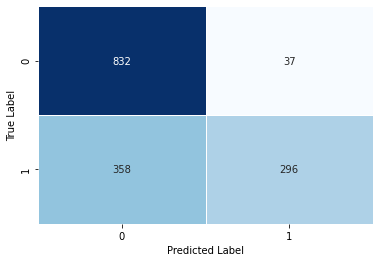

In [30]:
acc_bow2_logreg = c_report(y_valid,pred_bow2_logreg)
plot_cm(y_valid,pred_bow2_logreg)

We can observe that as n is increasing model accuracy is decreasing   
let's try to increase n one last time just to be sure

In [31]:
model_bow3_logreg = LogisticRegression()
model_bow3_logreg.fit(X_train_bow3,y_train)
pred_bow3_logreg = model_bow3_logreg.predict(X_valid_bow3)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=3) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       869
           1       0.92      0.33      0.49       654

    accuracy                           0.70      1523
   macro avg       0.79      0.65      0.64      1523
weighted avg       0.77      0.70      0.66      1523

Accuracy : 0.7005909389363099


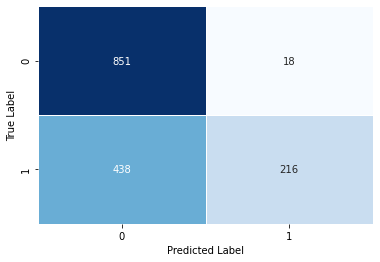

In [32]:
acc_bow3_logreg = c_report(y_valid,pred_bow3_logreg)
plot_cm(y_valid,pred_bow3_logreg)

From the above results it's clear that using n = 1 will always give us more accuray,  
now let's use tfidf approach with n = 1 to train our Logistic Regression model

In [33]:
model_tfidf1_logreg = LogisticRegression(C=1.0)
model_tfidf1_logreg.fit(X_train_tfidf1,y_train)
pred_tfidf1_logreg = model_tfidf1_logreg.predict(X_valid_tfidf1)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(TF-IDF,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       869
           1       0.85      0.71      0.77       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523

Accuracy : 0.8207485226526592


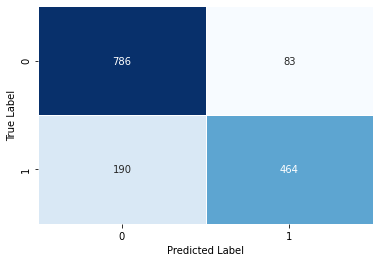

In [34]:
acc_tfidf1_logreg = c_report(y_valid,pred_tfidf1_logreg)
plot_cm(y_valid,pred_tfidf1_logreg)

From Logistic Regression we saw n-grams = 1 gives the best results 

## 6.2 Multinomial Naive Bayes

### About Multinomial Naive Bayes  

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

Naive Bayes classifier is a collection of many algorithms where all the algorithms share one common principle, and that is each feature being classified is not related to any other feature. The presence or absence of a feature does not affect the presence or absence of the other feature.
    
Now let's create [MultinomialNB](https://www.upgrad.com/blog/multinomial-naive-bayes-explained/) model and train it.

In [35]:
model_bow1_NB = MultinomialNB(alpha=0.7)
model_bow1_NB.fit(X_train_bow1,y_train)
pred_bow1_NB = model_bow1_NB.predict(X_valid_bow1)

MultinomialNB(alpha=0.7)

Printing classification report and ploting confusion matrix  for the predictions of MultinomialNB(BoW,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       869
           1       0.79      0.76      0.78       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.81      1523
weighted avg       0.81      0.81      0.81      1523

Accuracy : 0.8108995403808273


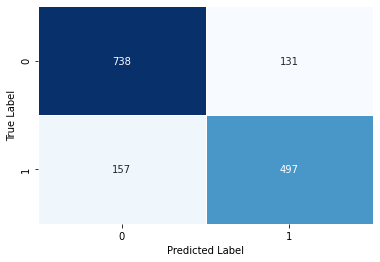

In [36]:
acc_bow1_NB = c_report(y_valid,pred_bow1_NB)
plot_cm(y_valid,pred_bow1_NB)

Creating a MultinomialNB model and training it with TF-IDF approach

In [37]:
model_tfidf1_NB = MultinomialNB(alpha=0.7)
model_tfidf1_NB.fit(X_train_tfidf1,y_train)
pred_tfidf1_NB = model_tfidf1_NB.predict(X_valid_tfidf1)

MultinomialNB(alpha=0.7)

Printing classification report and ploting confusion matrix for the predictions of MultinomialNB(TF-IDF,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       869
           1       0.84      0.70      0.76       654

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.82      0.81      0.81      1523

Accuracy : 0.8135259356533159


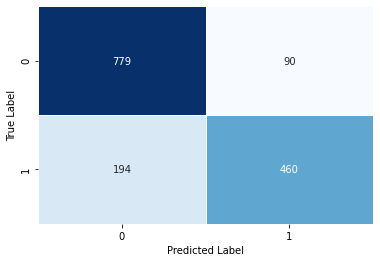

In [38]:
acc_tfidf1_NB = c_report(y_valid,pred_tfidf1_NB)
plot_cm(y_valid,pred_tfidf1_NB)

## 6.3 Random Forest Classifier

### About Random Forest Classifier   

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.   

Now let's create a [RandomForestClassifier](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/) model and train it.

In [39]:
model_tfidf1_RFC = RandomForestClassifier()
model_tfidf1_RFC.fit(X_train_tfidf1,y_train)
pred_tfidf1_RFC = model_tfidf1_RFC.predict(X_valid_tfidf1)

RandomForestClassifier()

Printing classification report and ploting confusion matrix for predictions of RandomForestClassifier model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       869
           1       0.80      0.70      0.75       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Accuracy : 0.7977675640183848


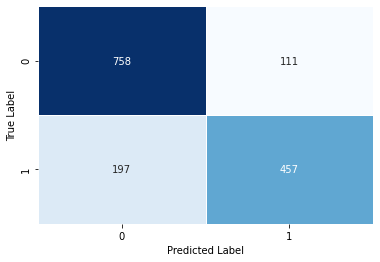

In [40]:
acc_tfidf1_RFC = c_report(y_valid,pred_tfidf1_RFC)
plot_cm(y_valid,pred_tfidf1_RFC)

## 6.4 eXtreme Gradient Boosting Classifier

### About XGBClassifier
The XGBoost stands for eXtreme Gradient Boosting, which is a boosting algorithm based on gradient boosted decision trees algorithm.     
XGBoost applies a better regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting.    

Now let's create a [XGBClassifier](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/) model and train it.

In [41]:
model_tfidf1_XGB = XGBClassifier(eval_metric='mlogloss')
model_tfidf1_XGB.fit(X_train_tfidf1,y_train)
pred_tfidf1_XGB = model_tfidf1_XGB.predict(X_valid_tfidf1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Printing classification report and ploting confusion matrix for the predictions made by the XGBClassifier model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       869
           1       0.83      0.67      0.74       654

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

Accuracy : 0.799080761654629


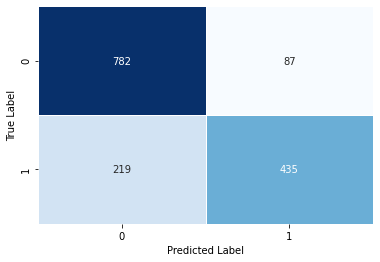

In [42]:
acc_tfidf1_XGB = c_report(y_valid,pred_tfidf1_XGB)
plot_cm(y_valid,pred_tfidf1_XGB)

## 6.5 CatBoostClassifier

### About CatBoostClassifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today. To top it up, it provides best-in-class accuracy.    

It yields state-of-the-art results without extensive data training typically required by other machine learning methods. 
   
“Boost” comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library.      
Gradient boosting is a powerful machine learning algorithm that is widely applied to multiple types of business challenges like fraud detection, recommendation items, forecasting and it performs well also. It can also return very good result with relatively less data, unlike DL models that need to learn from a massive amount of data.


Now let's create a [CatBoostClassifier](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html) model with 100 iterations and training it

In [43]:
model_tfidf1_CBC = CatBoostClassifier(iterations=100)
model_tfidf1_CBC.fit(X_train_tfidf1,y_train)
pred_tfidf1_CBC = model_tfidf1_CBC.predict(X_valid_tfidf1)


Learning rate set to 0.184063
0:	learn: 0.6743274	total: 114ms	remaining: 11.3s
1:	learn: 0.6618904	total: 161ms	remaining: 7.87s
2:	learn: 0.6520943	total: 207ms	remaining: 6.7s
3:	learn: 0.6418201	total: 254ms	remaining: 6.09s
4:	learn: 0.6352625	total: 300ms	remaining: 5.7s
5:	learn: 0.6269389	total: 348ms	remaining: 5.46s
6:	learn: 0.6206143	total: 395ms	remaining: 5.24s
7:	learn: 0.6149622	total: 441ms	remaining: 5.07s
8:	learn: 0.6095796	total: 489ms	remaining: 4.95s
9:	learn: 0.6053872	total: 537ms	remaining: 4.83s
10:	learn: 0.6008988	total: 585ms	remaining: 4.74s
11:	learn: 0.5972412	total: 633ms	remaining: 4.64s
12:	learn: 0.5937268	total: 680ms	remaining: 4.55s
13:	learn: 0.5912776	total: 728ms	remaining: 4.47s
14:	learn: 0.5870588	total: 774ms	remaining: 4.38s
15:	learn: 0.5836485	total: 822ms	remaining: 4.31s
16:	learn: 0.5799211	total: 870ms	remaining: 4.25s
17:	learn: 0.5762414	total: 921ms	remaining: 4.19s
18:	learn: 0.5735195	total: 970ms	remaining: 4.13s
19:	learn: 0.

Printing classification report and ploting confusion matrix for the predictions made by the above model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       869
           1       0.82      0.66      0.73       654

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523

Accuracy : 0.793827971109652


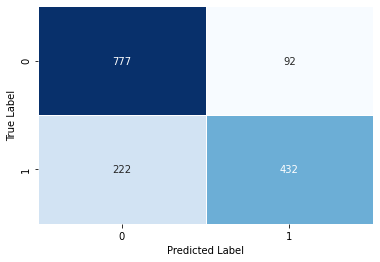

In [44]:
acc_tfidf1_CBC = c_report(y_valid,pred_tfidf1_CBC)
plot_cm(y_valid,pred_tfidf1_CBC)

## 6.6 Support Vector CLassifier 

### About SVC
SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.   

Now let's create a [SVC](https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/) model and training it

In [45]:
model_tfidf1_SVC = SVC(kernel='linear', degree=3, gamma='auto')
model_tfidf1_SVC.fit(X_train_tfidf1,y_train)
pred_tfidf1_SVC = model_tfidf1_SVC.predict(X_valid_tfidf1)

SVC(gamma='auto', kernel='linear')

Printing classification report and ploting confusion matrix for the SVC model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       869
           1       0.83      0.74      0.78       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523

Accuracy : 0.8214051214707814


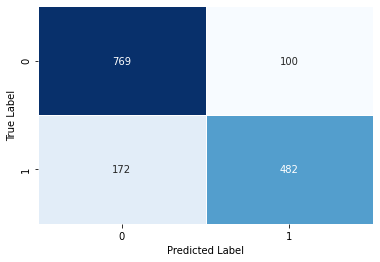

In [46]:
acc_tfidf1_SVC = c_report(y_valid,pred_tfidf1_SVC)
plot_cm(y_valid,pred_tfidf1_SVC)

## 6.7 Voting Classifier

### About Voting Classifier

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on    
their highest probability of chosen class as the output. It simply aggregates the findings of each classifier passed into Voting Classifier    
and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

#### Voting Classifier supports two types of votings :  


* **Hard Voting** : In hard voting, the predicted output class is a class with the highest majority of votes i.e the class    which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.


* **Soft Voting** : In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier
 
 
Now let's create a [VotingClassifier](https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/) with soft voting and train it 

In [47]:
estimators = []
estimators.append(('LR', 
                  LogisticRegression()))
estimators.append(('NB', MultinomialNB(alpha=0.7)))
estimators.append(('XBG', XGBClassifier(eval_metric='mlogloss')))

model_tfidf1_VC = VotingClassifier(estimators=estimators,voting='soft')
model_tfidf1_VC.fit(X_train_tfidf1,y_train)
pred_tfidf1_VC = model_tfidf1_VC.predict(X_valid_tfidf1)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('NB', MultinomialNB(alpha=0.7)),
                             ('XBG',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='mlogloss', gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                 

Printing classification report and ploting confusion matrix for VotingClasssifier

Classifictaion Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       869
           1       0.87      0.72      0.78       654

    accuracy                           0.83      1523
   macro avg       0.84      0.82      0.82      1523
weighted avg       0.84      0.83      0.83      1523

Accuracy : 0.8312541037426132


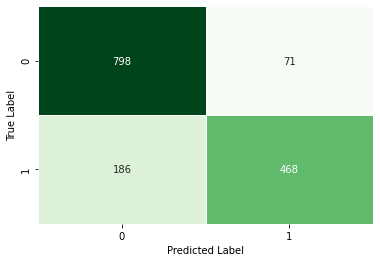

In [48]:
acc_tfidf1_VC = c_report(y_valid,pred_tfidf1_VC)
plot_cm(y_valid,pred_tfidf1_VC,cmap = "Greens")

# 7. Comparing the Accuracy of all models

In [49]:
results = pd.DataFrame([["Logistic Regression BoW1",acc_bow1_logreg],["Logistic Regression BoW2",acc_bow2_logreg],
                       ["Logistic Regression BoW3",acc_bow3_logreg],["Logistic Regression Tf-Idf1",acc_tfidf1_logreg],
                       ["Naive Bayes Tf-Idf1",acc_tfidf1_NB],["Random Forest Tf-Idf1",acc_tfidf1_RFC],
                       ["XGBClassifier Tf-Idf1",acc_tfidf1_XGB],["CatBoost Tf-Idf1",acc_tfidf1_CBC],
                        ["SVC Tf-Idf1",acc_tfidf1_SVC],["Voting Tf-Idf1",acc_tfidf1_VC]],
                       columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)

results.style.background_gradient(cmap='Blues')

,Models,Accuracy Score
9,Voting Tf-Idf1,0.831254
8,SVC Tf-Idf1,0.821405
3,Logistic Regression Tf-Idf1,0.820749
0,Logistic Regression BoW1,0.816152
4,Naive Bayes Tf-Idf1,0.813526
6,XGBClassifier Tf-Idf1,0.799081
5,Random Forest Tf-Idf1,0.797768
7,CatBoost Tf-Idf1,0.793828
1,Logistic Regression BoW2,0.740643
2,Logistic Regression BoW3,0.700591


# 8. Conclusion

Among all Simple classification models used above Voting Classifier performed best with tf-idf and ngrams = 1